# Name : Gobinath Periyasamy
# Roll No : CS21M501

## iii. Run the K-means algorithm with K = 4 on the same data. Plot the objective of K − means as a function of iterations.

In [133]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

df = pd.read_csv("A2Q1.csv",header = None,prefix= 'column')

In [134]:
from sklearn.datasets import make_blobs
n_clusters = 4
X, y = df['column0'],0
#Samples and featurees
n_samples = X.shape[0]
n_features = 1
print(type(X),type(1))
print(n_samples,1)

<class 'pandas.core.series.Series'> <class 'int'>
1000 1


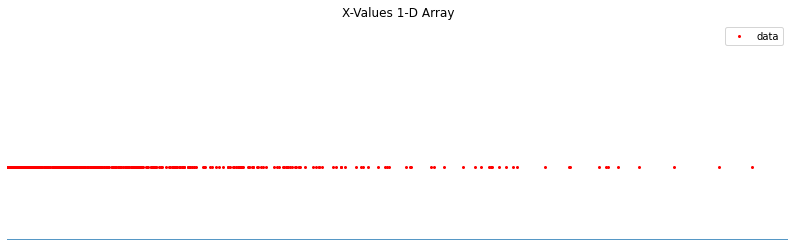

In [137]:


plt.figure(figsize = (14,4))
plt.hlines(0.001,0.002,1000)  # Draw a horizontal line
plt.xlim(0,100)
plt.ylim(0,3)
y = np.ones(np.shape(df))   # Make all y values the same
plt.title("X-Values 1-D Array")
plt.xlabel('Given X data')
plt.plot(df.head(1000),y[:1000],'.',color ='red', ms = 4,label = 'data')  # Plot a line at each location specified in a
plt.axis('off')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [138]:
n_clusters = 4
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

In [139]:
centroids = centroid_initialization(X, n_clusters)
centroids

array([[0.94928],
       [0.60421],
       [0.78447],
       [1.0965 ]])

In [140]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [141]:
current_clusters = cluster_assignment(X , centroids, n_clusters)
#current_clusters

In [142]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

In [143]:
update_centroids(X , current_clusters, n_clusters)

array([[ 0.93900173],
       [ 0.32177256],
       [ 0.7720825 ],
       [12.68172675]])

In [144]:
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    if not diff.any():
        print("K-Means Converged")
        break

K-Means Converged


In [145]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

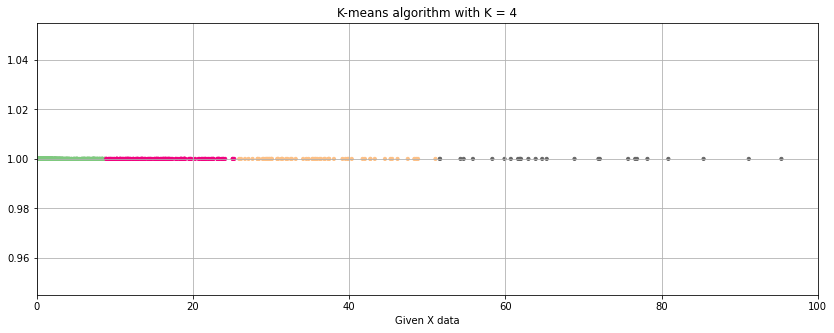

In [146]:
#Visualization
plt.figure(figsize = (14,5))
plt.xlim(0,100)
plt.title('K-means algorithm with K = 4')
plt.xlabel('Given X data')
plt.grid()
plt.scatter(X,y, c=y_pred, s=10, cmap= 'Accent')


### K-means the data in 2D spread

<class 'pandas.core.series.Series'> <class 'int'>
1000 1000


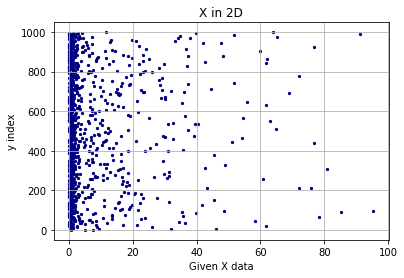

[[ 8.22048969  8.22048969  8.22048969 ...  8.22048969  8.22048969
   8.22048969]
 [ 0.14217907  0.14217907  0.14217907 ...  0.14217907  0.14217907
   0.14217907]
 [ 2.71062761  2.71062761  2.71062761 ...  2.71062761  2.71062761
   2.71062761]
 [-0.06112213 -0.06112213 -0.06112213 ... -0.06112213 -0.06112213
  -0.06112213]]
[[6.07621031 6.07621031 6.07621031 ... 6.07621031 6.07621031 6.07621031]
 [0.02292238 0.02292238 0.02292238 ... 0.02292238 0.02292238 0.02292238]
 [3.90137996 3.90137996 3.90137996 ... 3.90137996 3.90137996 3.90137996]
 [0.3867145  0.3867145  0.3867145  ... 0.3867145  0.3867145  0.3867145 ]]
[[5.19500093 5.19500093 5.19500093 ... 5.19500093 5.19500093 5.19500093]
 [0.09202655 0.09202655 0.09202655 ... 0.09202655 0.09202655 0.09202655]
 [3.43639244 3.43639244 3.43639244 ... 3.43639244 3.43639244 3.43639244]
 [0.5170358  0.5170358  0.5170358  ... 0.5170358  0.5170358  0.5170358 ]]
[[3.84800361 3.84800361 3.84800361 ... 3.84800361 3.84800361 3.84800361]
 [0.12420506 0.1

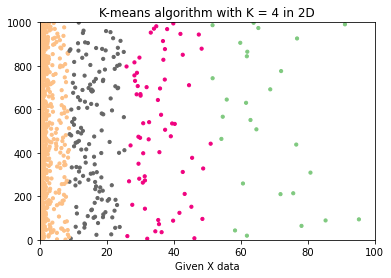

In [148]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

df = pd.read_csv("A2Q1.csv",header = None,prefix= 'column')
df.reset_index(level=0, inplace=True)
df
from sklearn.datasets import make_blobs
n_clusters = 4
X, y = df['column0'],df['index']
#Samples and featurees
n_samples = X.shape[0]
n_features = y.shape[0]
print(type(X),type(n_features))
print(n_samples,n_features)
#Dataset visualization

plt.title('X in 2D')
plt.xlabel('Given X data')
plt.ylabel('y index')
plt.scatter(X,y,color = 'navy', s=5);
plt.grid()
# visualizing plot using matplotlib.pyplot library

plt.show()

centroids = centroid_initialization(X, n_clusters)
centroids


current_clusters = cluster_assignment(X , centroids, n_clusters)
#current_clusters


n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id
#Visualization
plt.xlim(0,100)
plt.ylim(0,1000)

plt.title('K-means algorithm with K = 4 in 2D')
plt.xlabel('Given X data')
plt.scatter(X,y, c=y_pred, s=10, cmap= 'Accent')